# Very Simple Config Finder for Mithril
- input: target Nth (MAC values), Ad_th, blast_radius, and DDR constraints.
- output: necessary number of Nentry and size of the table (KB).

## 1. Input / Output Definition

In [10]:
import math
import pandas as pd

# Input - Candidates
NTH_list = [1500, 3125, 6250, 12500, 25000, 50000]
#RAAIMT_LIST = [32,64,128,256]
Ad_th = 0

# Constants
tREFW   = 32000000
tREFI   = 3900
num_REF = 8192
tRC     = 48.75
tRFC    = 295
tRFM    = 2*tRC

# Output - Lists
found_config={}


## 2. Equation from Theorem 1

In [11]:
# Function
def calculate_M(N, T, d):
  # R: number of RAAIMT intervals in a tREFW window 
  # m: term for n* in Theorem 2, which is related to Ad_th value
  # M: 
  R = math.floor( float(tREFW - num_REF*tRFC)/float(T*tRC + tRFM) )
  m = math.ceil( float(N*T)/float(T+d) )
  M = 0.0

  # 1. Reduction Region
  partial_sum = 0.0
  for k in range(1,m):
      partial_sum += float(1/float(k))
  M += T*partial_sum
  bits = math.ceil(M)

  # 2. Even Region & Initial Condition
  M += float((R-m)*T - m*d)/float(N)
  M += d + T*(float(N-2)/float(N))
  return [math.floor(M),bits]

## 3. Main Loop for multiple configurations

In [12]:
# Body
def main_runner():
  return_Nentry = 0

  for cur_nth in NTH_list:
    #print("\n[",cur_nth,"]")
    found_config[cur_nth] = {}
    for cur_RAAIMT in range(16,512,8):

      for Nentry in range(10,1200,10):
        [M,bits] = calculate_M(Nentry, int(cur_RAAIMT), int(Ad_th))
        #if 3.75*M > cur_nth : # this is for max blast radius, referncing Revisiting Rowhammer & BlockHammer
        if 2*M > cur_nth :
          return_Nentry = Nentry
        else:
          bits = math.ceil( math.log2(bits) ) + 14
          found_config[cur_nth][cur_RAAIMT] = return_Nentry
          #print("RESULT: 2*M ",M*2," Nth ",cur_nth," Nentry ",return_Nentry," cur_RAAIMT ",cur_RAAIMT," sizeKB ",return_Nentry*bits/8192," bits ",bits)
          break

In [13]:
main_runner()

#print(found_config)



[ 1500 ]

[ 3125 ]

[ 6250 ]

[ 12500 ]

[ 25000 ]

[ 50000 ]
{1500: {16: 850, 24: 970, 32: 1120}, 3125: {16: 360, 24: 390, 32: 420, 40: 440, 48: 460, 56: 490, 64: 520, 72: 550, 80: 580, 88: 620, 96: 670, 104: 720, 112: 790, 120: 870, 128: 980, 136: 1130}, 6250: {16: 170, 24: 180, 32: 190, 40: 190, 48: 200, 56: 200, 64: 210, 72: 210, 80: 220, 88: 220, 96: 230, 104: 230, 112: 240, 120: 240, 128: 250, 136: 260, 144: 260, 152: 270, 160: 280, 168: 280, 176: 290, 184: 300, 192: 310, 200: 320, 208: 330, 216: 340, 224: 350, 232: 370, 240: 380, 248: 400, 256: 420, 264: 440, 272: 460, 280: 480, 288: 510, 296: 550, 304: 590, 312: 650, 320: 720, 328: 810, 336: 960}, 12500: {16: 80, 24: 90, 32: 90, 40: 90, 48: 90, 56: 90, 64: 90, 72: 100, 80: 100, 88: 100, 96: 100, 104: 100, 112: 100, 120: 100, 128: 100, 136: 100, 144: 100, 152: 100, 160: 110, 168: 110, 176: 110, 184: 110, 192: 110, 200: 110, 208: 110, 216: 110, 224: 110, 232: 120, 240: 120, 248: 120, 256: 120, 264: 120, 272: 120, 280: 120, 288: 

In [14]:
df = pd.DataFrame(found_config)
df.plot()

      1500   3125   6250   12500  25000  50000
16    850.0  360.0  170.0     80     40     20
24    970.0  390.0  180.0     90     40     20
32   1120.0  420.0  190.0     90     40     20
40      NaN  440.0  190.0     90     40     20
48      NaN  460.0  200.0     90     40     20
..      ...    ...    ...    ...    ...    ...
472     NaN    NaN    NaN    160     50     20
480     NaN    NaN    NaN    170     50     20
488     NaN    NaN    NaN    170     50     20
496     NaN    NaN    NaN    170     50     20
504     NaN    NaN    NaN    180     50     20

[62 rows x 6 columns]


<AxesSubplot:>

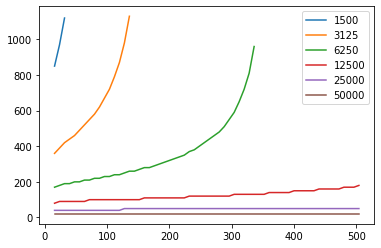

In [9]:
df.plot()